In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Combining Datasets obtained from Cal-Adapt

In [ ]:
df_evapo = pd.read_csv("/content/fresno_evapotranspiration_1950_2013.csv")
df_evapo.rename(columns={'time': 'date', 'et_day_livneh_vic': 'daily_evapotranspiration'}, inplace=True)
df_evapo = df_evapo.drop('date', axis=1)
df_evapo.head()

FileNotFoundError: [Errno 2] No such file or directory: '/content/fresno_evapotranspiration_1950_2013.csv'

In [ ]:
df_daily_max = pd.read_csv("/content/fresno_maxTemp_1950_2013.csv")
df_daily_max.rename(columns={'time': 'date', 'tasmax_day_livneh': 'daily_maxTemp'}, inplace=True)
df_daily_max = df_daily_max.drop('date', axis=1)
df_daily_max.head()

,daily_maxTemp
0,6.173168
1,3.339462
2,1.377536
3,0.540207
4,3.423975


In [ ]:
df_daily_min = pd.read_csv("/content/fresno_minTemp_1950_2013.csv")
df_daily_min.rename(columns={'time': 'date', 'tasmin_day_livneh': 'daily_minTemp'}, inplace=True)
df_daily_min = df_daily_min.drop('date', axis=1)
df_daily_min.head()

,daily_minTemp
0,-2.329379
1,-5.007868
2,-10.638012
3,-11.244327
4,-10.967143


In [ ]:
df_daily_precipitation = pd.read_csv("/content/fresno_precipitation_1950_2013.csv")
df_daily_precipitation.rename(columns={'time': 'date', 'tasmax_day_livneh': 'daily_precipitation'}, inplace=True)
df_daily_precipitation.head()

,date,pr_day_livneh
0,1950-01-01 00:00:00+00:00,1.233334
1,1950-01-02 00:00:00+00:00,4.585143
2,1950-01-03 00:00:00+00:00,0.351538
3,1950-01-04 00:00:00+00:00,0.086464
4,1950-01-05 00:00:00+00:00,0.007825


In [ ]:
df_daily_soilMoisture = pd.read_csv("/content/fresno_soilMoisture_1950_2013.csv")
df_daily_soilMoisture.rename(columns={'time': 'date', 'soilmoist1_day_livneh_vic': 'daily_soilMoisture'}, inplace=True)
df_daily_soilMoisture.head()

,date,daily_soilMoisture
0,1950-01-01 00:00:00+00:00,18.382278
1,1950-01-02 00:00:00+00:00,19.044817
2,1950-01-03 00:00:00+00:00,19.073204
3,1950-01-04 00:00:00+00:00,19.034538
4,1950-01-05 00:00:00+00:00,19.051575


In [ ]:
combined_df = pd.concat([df_daily_precipitation, df_evapo, df_daily_max, df_daily_min, df_daily_soilMoisture], axis=1)
combined_df.head()

,date,pr_day_livneh,daily_evapotranspiration,daily_maxTemp,daily_minTemp,date,daily_soilMoisture
0,1950-01-01 00:00:00+00:00,1.233334,0.586743,6.173168,-2.329379,1950-01-01 00:00:00+00:00,18.382278
1,1950-01-02 00:00:00+00:00,4.585143,0.841818,3.339462,-5.007868,1950-01-02 00:00:00+00:00,19.044817
2,1950-01-03 00:00:00+00:00,0.351538,0.358946,1.377536,-10.638012,1950-01-03 00:00:00+00:00,19.073204
3,1950-01-04 00:00:00+00:00,0.086464,0.212138,0.540207,-11.244327,1950-01-04 00:00:00+00:00,19.034538
4,1950-01-05 00:00:00+00:00,0.007825,0.194017,3.423975,-10.967143,1950-01-05 00:00:00+00:00,19.051575


In [ ]:
combined_df.to_csv('merged_fresno_dataset.csv', index=False)

## Extracting monthly SPEI data for California counties
* code to obtain SPEI data from global SPEI .NC file

In [2]:
!pip install xarray netCDF4 pandas
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 59.6 MB/s eta 0:00:00


In [9]:
# load the NetCDF file
# spei1_data = xr.open_dataset("/content/global_spei_1_month_timescale_1901_2023.nc")
# spei6_data = xr.open_dataset("/content/global_spei_6_month_timescale_1901_2023.nc")
spei12_data = xr.open_dataset("/content/global_spei_12_month_timescale_1901_2023.nc")

print(spei12_data)

<xarray.Dataset> Size: 2GB
Dimensions:  (lon: 720, lat: 360, time: 1476)
Coordinates:
  * lon      (lon) float64 6kB -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 12kB 1901-01-16 1901-02-15 ... 2023-12-16
Data variables:
    spei     (time, lat, lon) float32 2GB ...
    crs      int32 4B ...
Attributes: (12/15)
    conventions:  CF-1.11
    title:        Global 12-months SPEI, z-values, 0.5 degree
    version:      2.10.0
    id:           ./outputNcdf/spei12.nc
    summary:      Global dataset of the Standardized Precipitation-Evapotrans...
    keywords:     drought, climatology, SPEI, Standardized Precipitation-Evap...
    ...           ...
    software:     Created in R using the SPEI package (https://cran.r-project...
    call:         spei.nc(sca=i, inPre=./inputData/cru_ts4.08.1901.2023.pre.d...
    date:         Wed Jul 10 11:04:12 2024
    reference:    Beguer

#### Fresno County

In [ ]:
# select data for Fresno County
# - LA County coord is (36.75, -119.75) and dataset has a 0.5 x 0.5 spatial resolution meaning each grid cell is an area of size 55 km x 55 km
fresno_spei = data['spei'].sel(lat=36.75, lon=-119.75, method='nearest')

# filter data for the time range 1950-2013
fresno_spei = fresno_spei.sel(time=slice('1950-01', '2013-12'))

# convert to df
fresno_spei_df = fresno_spei.to_dataframe().reset_index()

In [ ]:
fresno_spei_df.head()

,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,0.568691
1,1950-02-15,-119.75,36.75,-0.323044
2,1950-03-16,-119.75,36.75,-0.148050
3,1950-04-16,-119.75,36.75,-0.585958
4,1950-05-16,-119.75,36.75,-0.860067


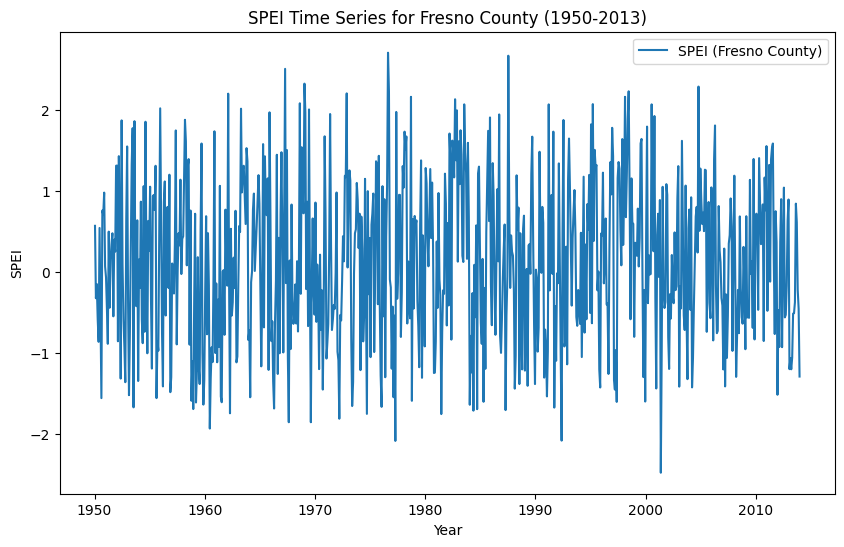

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(fresno_spei_df['time'], fresno_spei_df['spei'], label="SPEI (Fresno County)")
plt.xlabel("Year")
plt.ylabel("SPEI")
plt.title("SPEI Time Series for Fresno County (1950-2013)")
plt.legend()
plt.show()

In [ ]:
fresno_spei_df.to_csv('monthlySPEI_1950_2013_Fresno_County.csv', index=False)

#### Use this to get monthly SPEI values for other counties

In [5]:
data = xr.open_dataset("/content/global_spei_12_month_timescale_1901_2023.nc")

# enter central coords for a California county
county_name = "Fresno"
spei = "SPEI_12"
county_lat = 36.75
county_lon = -119.75

# - dataset has a 0.5 x 0.5 spatial resolution meaning each grid cell is an area of size 55 km x 55 km
county_spei = data['spei'].sel(lat=county_lat, lon=county_lon, method='nearest')

# filter data for the time range 1950-2013
county_spei_1950_to_2013 = county_spei.sel(time=slice('1950-01', '2013-12'))

# convert to df
county_spei_1950_to_2013_df = county_spei_1950_to_2013.to_dataframe().reset_index()

In [6]:
county_spei_1950_to_2013_df.head()

,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,-0.291648
1,1950-02-15,-119.75,36.75,-0.343679
2,1950-03-16,-119.75,36.75,-0.756500
3,1950-04-16,-119.75,36.75,-0.402883
4,1950-05-16,-119.75,36.75,-0.857081


In [7]:
filename = spei + '_MonthTimescale_1950_2013_' + county_name + '.csv'
county_spei_1950_to_2013_df.to_csv(filename, index=False)

## Combining monthly SPEI data with daily raw data

In [ ]:
monthly_fresno_spei_df = fresno_spei_df.copy()
monthly_fresno_spei_df['time'] = pd.to_datetime(monthly_fresno_spei_df['time']) # convert 'time' to datetime
monthly_fresno_spei_df.head(5)

,time,lon,lat,spei
0,1950-01-16,-119.75,36.75,0.568691
1,1950-02-15,-119.75,36.75,-0.323044
2,1950-03-16,-119.75,36.75,-0.148050
3,1950-04-16,-119.75,36.75,-0.585958
4,1950-05-16,-119.75,36.75,-0.860067


In [ ]:

daily_rows = []
for index, row in monthly_fresno_spei_df.iterrows():

  # get date range for each month
  date_range = pd.date_range(start=row['time'], periods=1, freq='M')  # get range of timepoints
  start_date = date_range[0].replace(day=1)  # get first day of the month
  # print(f"start date: {start_date} | days in the month: {days_in_month}")
  days_in_month = (start_date + pd.offsets.MonthEnd()).day  # get num of days in curr month

  for day in range(1, days_in_month + 1):
    daily_date = start_date.replace(day=day)
    daily_spei = row['spei']
    # print(f"daily date: {daily_date}")
    # print(f"daily spei: {daily_spei}")
    # print()
    daily_rows.append({'time': daily_date, 'spei': daily_spei})

# create new dataframe
daily_fresno_spei_df = pd.DataFrame(daily_rows)
daily_fresno_spei_df.head(70)

<ipython-input-23-f51d428063b6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start=row['time'], periods=1, freq='M')  # get range of timepoints


,time,spei
0,1950-01-01,0.568691
1,1950-01-02,0.568691
2,1950-01-03,0.568691
3,1950-01-04,0.568691
4,1950-01-05,0.568691
...,...,...
65,1950-03-07,-0.148050
66,1950-03-08,-0.148050
67,1950-03-09,-0.148050
68,1950-03-10,-0.148050


In [ ]:
daily_fresno_spei_df.to_csv('dailySPEI_1950_2013_Fresno_County.csv', index=False)

### Combining merged LA County dataset with expanded SPEI dataset

In [ ]:
merged_df = pd.read_csv("/content/merged_fresno_dataset.csv")
expanded_SPEI_df = pd.read_csv("/content/dailySPEI_1950_2013_Fresno_County.csv")

In [ ]:
len(expanded_SPEI_df), len(merged_df)

(23376, 23376)

In [ ]:
merged_SPEI_df = pd.concat([merged_df, expanded_SPEI_df], axis=1)
merged_SPEI_df.head(2)

,date,pr_day_livneh,daily_evapotranspiration,daily_maxTemp,daily_minTemp,date.1,daily_soilMoisture,time,spei
0,1950-01-01 00:00:00+00:00,1.233334,0.586743,6.173168,-2.329379,1950-01-01 00:00:00+00:00,18.382278,1950-01-01,0.568691
1,1950-01-02 00:00:00+00:00,4.585143,0.841818,3.339462,-5.007868,1950-01-02 00:00:00+00:00,19.044817,1950-01-02,0.568691


In [ ]:
merged_SPEI_df = merged_SPEI_df.drop(columns=['time'], axis=1)
merged_SPEI_df.head(2)

,date,pr_day_livneh,daily_evapotranspiration,daily_maxTemp,daily_minTemp,daily_soilMoisture,spei
0,1950-01-01 00:00:00+00:00,1.233334,0.586743,6.173168,-2.329379,18.382278,0.568691
1,1950-01-02 00:00:00+00:00,4.585143,0.841818,3.339462,-5.007868,19.044817,0.568691


In [ ]:
merged_SPEI_df['date'] = pd.to_datetime(merged_SPEI_df['date']).dt.date
merged_SPEI_df.head(2)

,date,pr_day_livneh,daily_evapotranspiration,daily_maxTemp,daily_minTemp,daily_soilMoisture,spei
0,1950-01-01,1.233334,0.586743,6.173168,-2.329379,18.382278,0.568691
1,1950-01-02,4.585143,0.841818,3.339462,-5.007868,19.044817,0.568691


In [ ]:
merged_SPEI_df.to_csv('merged_Fresno_County_dataset_with_SPEI.csv', index=False)

In [ ]:
merged_SPEI_df.head()

,date,pr_day_livneh,daily_evapotranspiration,daily_maxTemp,daily_minTemp,daily_soilMoisture,spei
0,1950-01-01,1.233334,0.586743,6.173168,-2.329379,18.382278,0.568691
1,1950-01-02,4.585143,0.841818,3.339462,-5.007868,19.044817,0.568691
2,1950-01-03,0.351538,0.358946,1.377536,-10.638012,19.073204,0.568691
3,1950-01-04,0.086464,0.212138,0.540207,-11.244327,19.034538,0.568691
4,1950-01-05,0.007825,0.194017,3.423975,-10.967143,19.051575,0.568691


## Data Visualizations

In [ ]:
df = pd.read_csv("/content/FresnoCounty_merged_dataset_with_SPEI.csv")
df['date'] = pd.to_datetime(df['date'])
if df.index.name != 'date':
    df.set_index('date', inplace=True)
df.head()

,daily_precipitation,daily_evapotranspiration,daily_maxTemp,daily_minTemp,daily_soilMoisture,spei
date,,,,,,
1950-01-01,1.233334,0.586743,6.173168,-2.329379,18.382278,0.568691
1950-01-02,4.585143,0.841818,3.339462,-5.007868,19.044817,0.568691
1950-01-03,0.351538,0.358946,1.377536,-10.638012,19.073204,0.568691
1950-01-04,0.086464,0.212138,0.540207,-11.244327,19.034538,0.568691
1950-01-05,0.007825,0.194017,3.423975,-10.967143,19.051575,0.568691


In [ ]:
df_yearly = df.resample('Y').agg({
    'daily_precipitation': 'sum',  # Sum up precipitation over each year
    'daily_evapotranspiration': 'sum',  # Sum up evapotranspiration over each year
    'daily_maxTemp': 'mean',       # Average max temperature for each year
    'daily_minTemp': 'mean',       # Average min temperature for each year
    'daily_soilMoisture': 'mean',  # Average soil moisture for each year
    'spei': 'mean'                 # Average SPEI for each year
})

<ipython-input-11-c4c3cca46bac>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_yearly = df.resample('Y').agg({


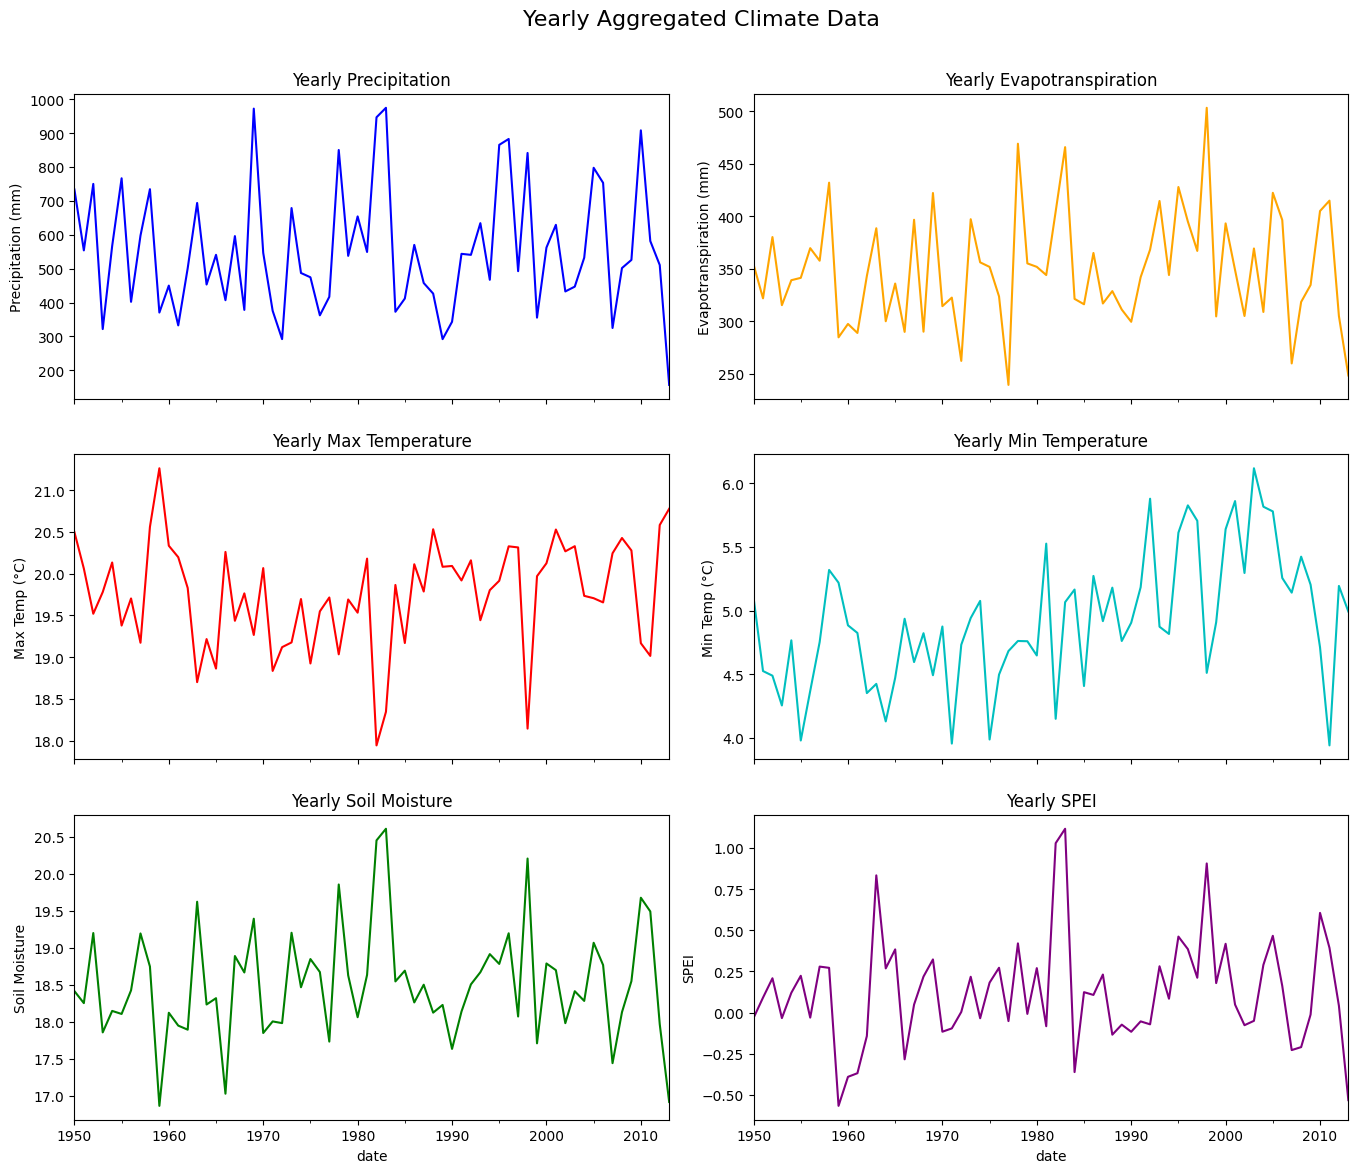

In [ ]:
# Plot yearly data
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True)

# Adjust layout
fig.suptitle('Yearly Aggregated Climate Data', fontsize=16)
fig.tight_layout(pad=3.0)

# Plot each variable in a separate subplot
df_yearly['daily_precipitation'].plot(ax=axes[0, 0], title='Yearly Precipitation', color='b')
axes[0, 0].set_ylabel('Precipitation (mm)')

df_yearly['daily_evapotranspiration'].plot(ax=axes[0, 1], title='Yearly Evapotranspiration', color='orange')
axes[0, 1].set_ylabel('Evapotranspiration (mm)')

df_yearly['daily_maxTemp'].plot(ax=axes[1, 0], title='Yearly Max Temperature', color='r')
axes[1, 0].set_ylabel('Max Temp (°C)')

df_yearly['daily_minTemp'].plot(ax=axes[1, 1], title='Yearly Min Temperature', color='c')
axes[1, 1].set_ylabel('Min Temp (°C)')

df_yearly['daily_soilMoisture'].plot(ax=axes[2, 0], title='Yearly Soil Moisture', color='g')
axes[2, 0].set_ylabel('Soil Moisture')

df_yearly['spei'].plot(ax=axes[2, 1], title='Yearly SPEI', color='purple')
axes[2, 1].set_ylabel('SPEI')

# Show the plot
plt.show()

In [ ]:
# la_spei_df

# Ensure 'time' is converted to datetime format and set as index
la_spei_df['time'] = pd.to_datetime(la_spei_df['time'])
la_spei_df.set_index('time', inplace=True)

In [ ]:
spei_yearly = la_spei_df['spei'].resample('Y').mean()
spei_yearly.head()

<ipython-input-25-39db793b28f0>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  spei_yearly = la_spei_df['spei'].resample('Y').mean()


,spei
time,
1950-12-31,-0.057066
1951-12-31,0.206520
1952-12-31,0.380438
1953-12-31,-0.400630
1954-12-31,-0.071567


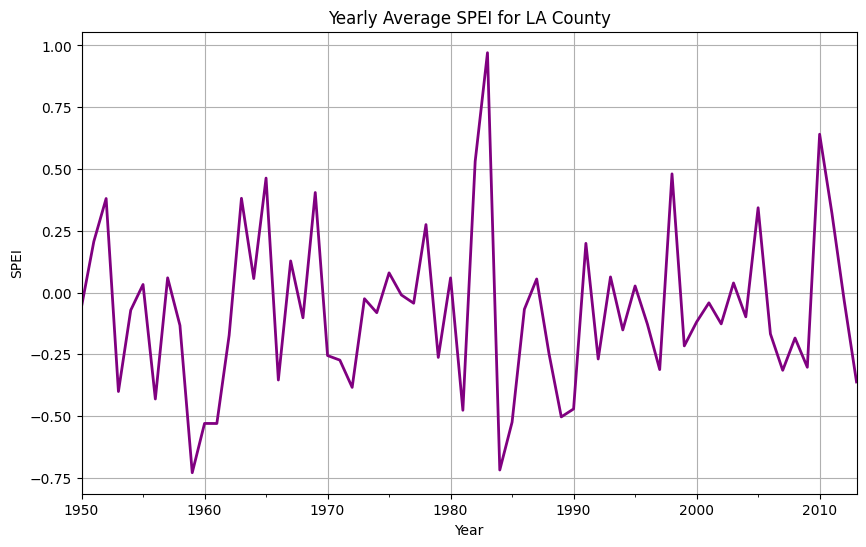

In [ ]:
"# Plot the yearly SPEI data
plt.figure(figsize=(10, 6))
spei_yearly.plot(title="Yearly Average SPEI for LA County", color="purple", linewidth=2)
plt.xlabel("Year")
plt.ylabel("SPEI")
plt.grid(True)
plt.show()


In [ ]:
# Resample SPEI to yearly averages
spei_yearly = la_spei_df['spei'].resample('Y').mean()


<ipython-input-34-af4d0facc4f6>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  spei_yearly = la_spei_df['spei'].resample('Y').mean()


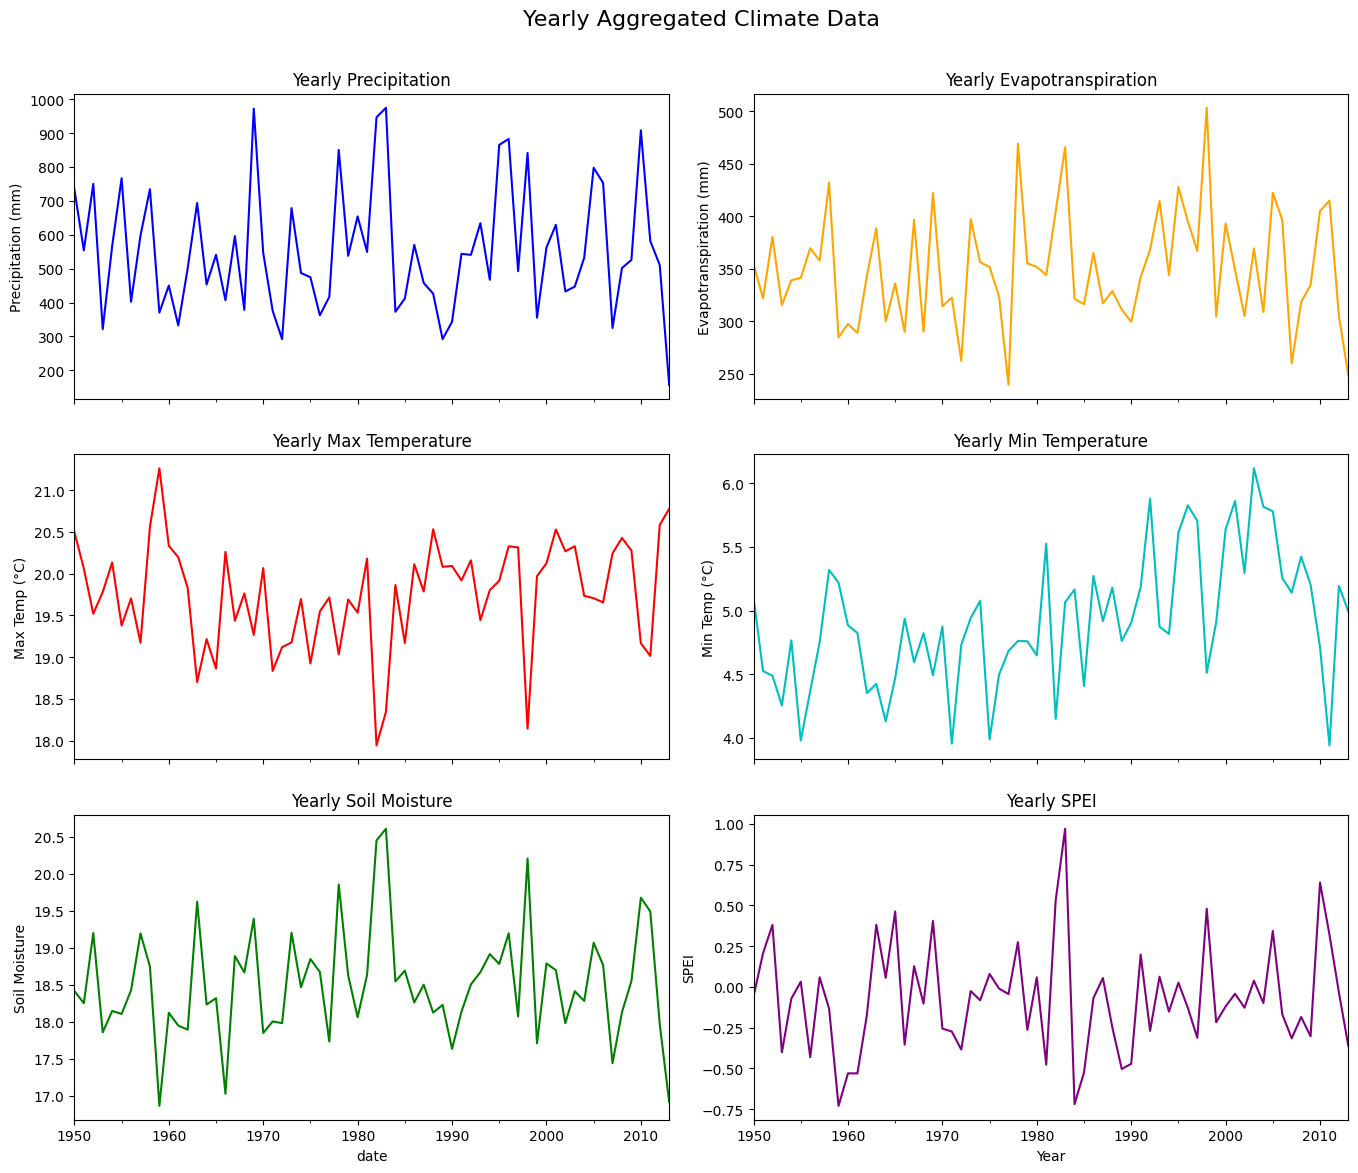

In [ ]:

# Plot yearly aggregated data
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True)

# Adjust layout
fig.suptitle('Yearly Aggregated Climate Data', fontsize=16)
fig.tight_layout(pad=3.0)

# Plot each variable in a separate subplot
df_yearly['daily_precipitation'].plot(ax=axes[0, 0], title='Yearly Precipitation', color='b')
axes[0, 0].set_ylabel('Precipitation (mm)')

df_yearly['daily_evapotranspiration'].plot(ax=axes[0, 1], title='Yearly Evapotranspiration', color='orange')
axes[0, 1].set_ylabel('Evapotranspiration (mm)')

df_yearly['daily_maxTemp'].plot(ax=axes[1, 0], title='Yearly Max Temperature', color='r')
axes[1, 0].set_ylabel('Max Temp (°C)')

df_yearly['daily_minTemp'].plot(ax=axes[1, 1], title='Yearly Min Temperature', color='c')
axes[1, 1].set_ylabel('Min Temp (°C)')

df_yearly['daily_soilMoisture'].plot(ax=axes[2, 0], title='Yearly Soil Moisture', color='g')
axes[2, 0].set_ylabel('Soil Moisture')

# Plot yearly SPEI data
spei_yearly.plot(ax=axes[2, 1], title='Yearly SPEI', color='purple')
axes[2, 1].set_ylabel('SPEI')

# Add shared x-axis label
plt.xlabel('Year')
plt.show()


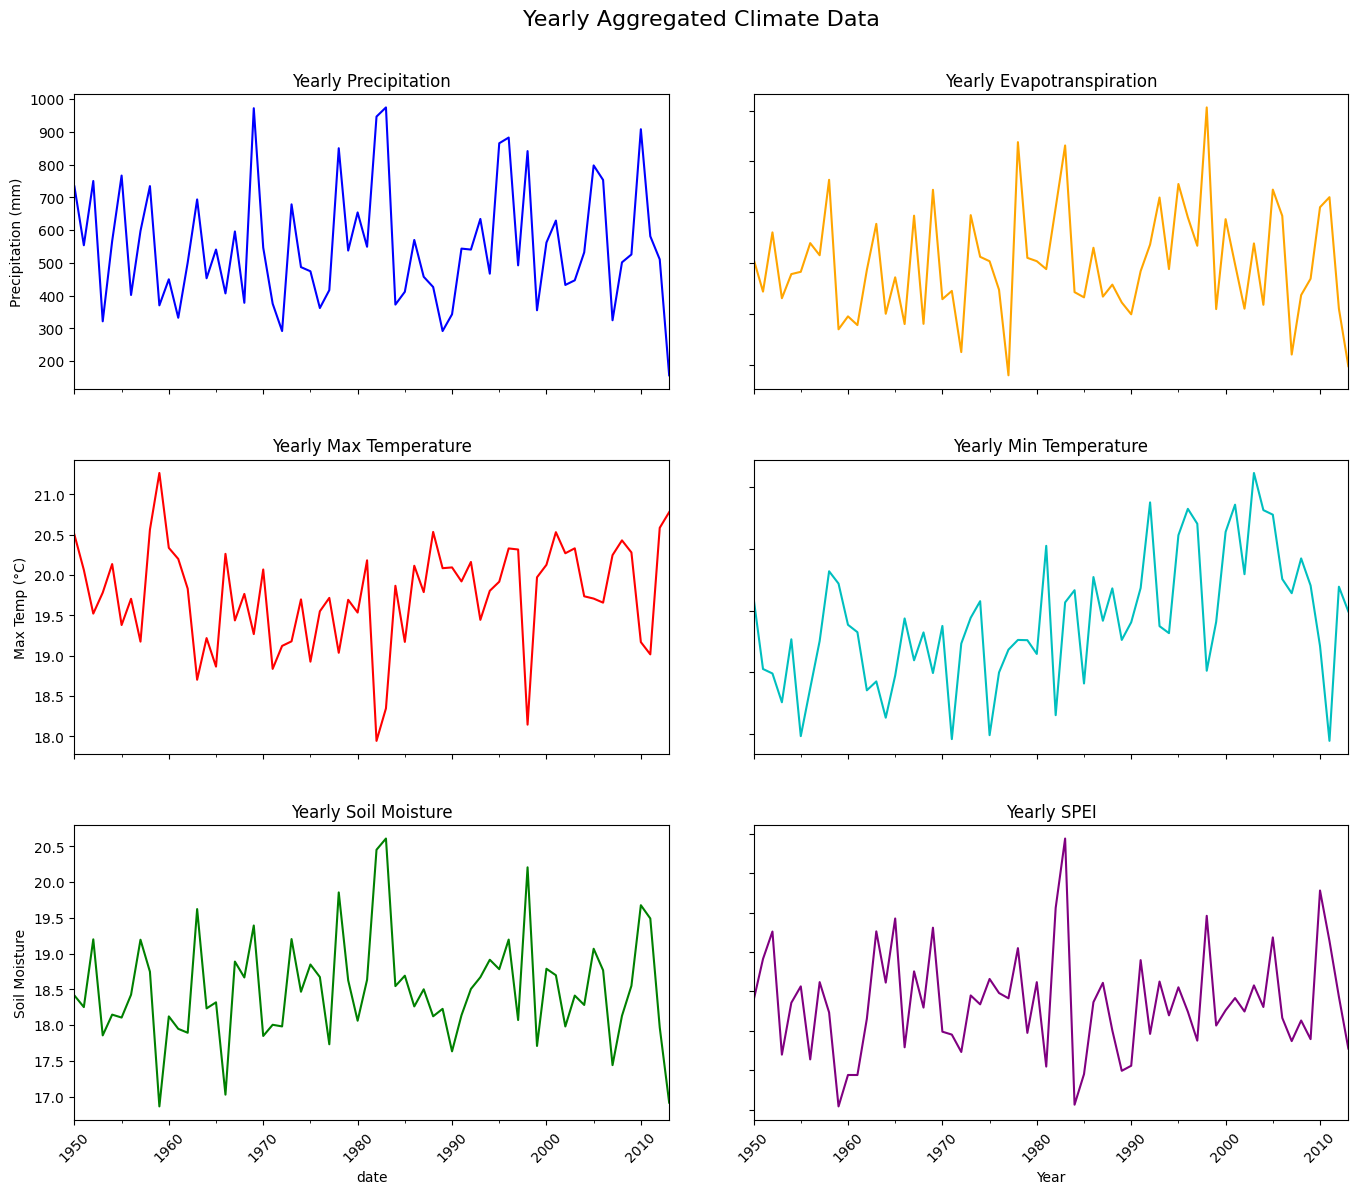

In [ ]:
import matplotlib.pyplot as plt

# Plot yearly aggregated data
fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=False)

# Adjust layout
fig.suptitle('Yearly Aggregated Climate Data', fontsize=16)
fig.tight_layout(pad=3.0)

# Plot each variable in a separate subplot
df_yearly['daily_precipitation'].plot(ax=axes[0, 0], title='Yearly Precipitation', color='b')
axes[0, 0].set_ylabel('Precipitation (mm)')

df_yearly['daily_evapotranspiration'].plot(ax=axes[0, 1], title='Yearly Evapotranspiration', color='orange')
axes[0, 1].set_ylabel('Evapotranspiration (mm)')

df_yearly['daily_maxTemp'].plot(ax=axes[1, 0], title='Yearly Max Temperature', color='r')
axes[1, 0].set_ylabel('Max Temp (°C)')

df_yearly['daily_minTemp'].plot(ax=axes[1, 1], title='Yearly Min Temperature', color='c')
axes[1, 1].set_ylabel('Min Temp (°C)')

df_yearly['daily_soilMoisture'].plot(ax=axes[2, 0], title='Yearly Soil Moisture', color='g')
axes[2, 0].set_ylabel('Soil Moisture')

spei_yearly.plot(ax=axes[2, 1], title='Yearly SPEI', color='purple')
axes[2, 1].set_ylabel('SPEI')

# Ensure x-axis labels are shown for all subplots
for ax in axes.flat:
    ax.label_outer()  # Hide labels on inner plots but show for bottom plots
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Add shared x-axis label
plt.xlabel('Year')
plt.show()


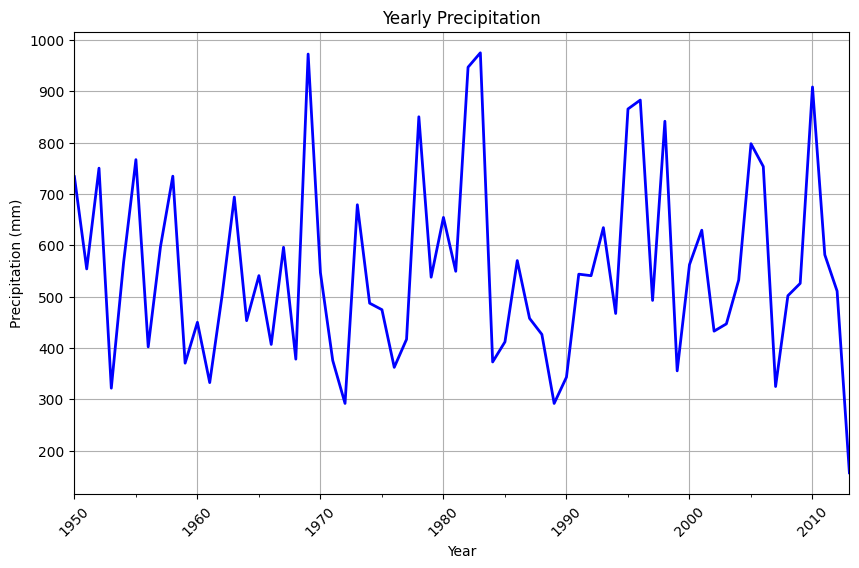

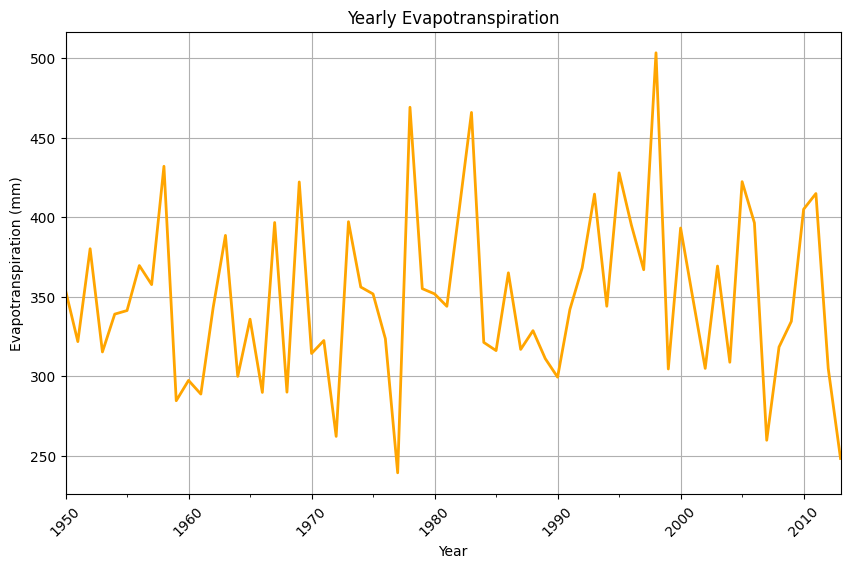

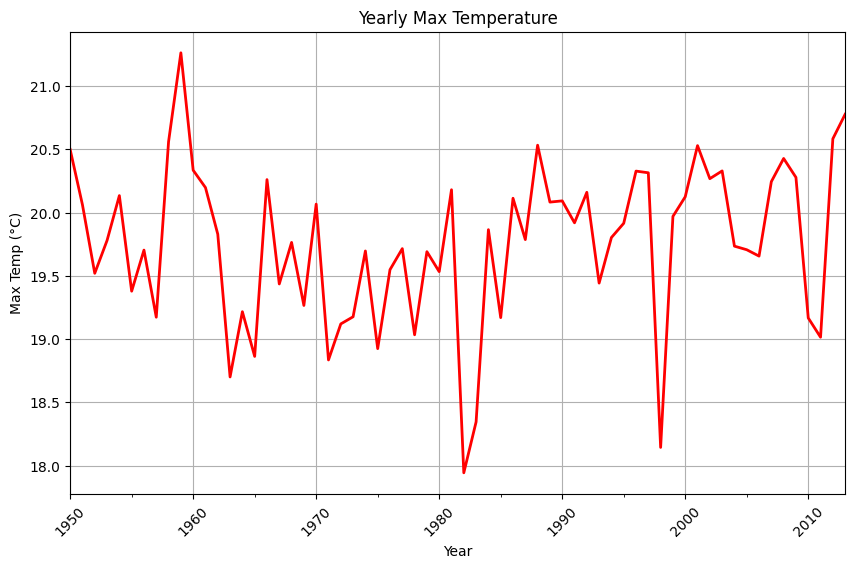

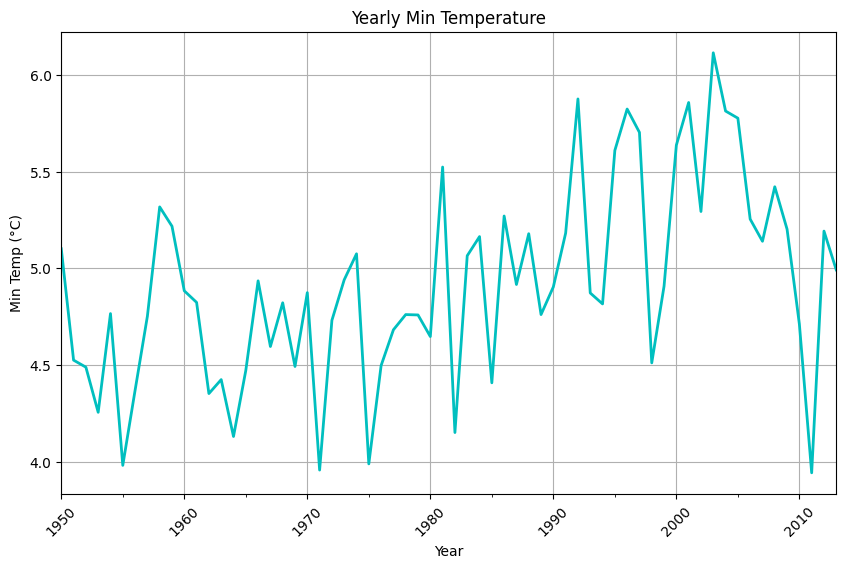

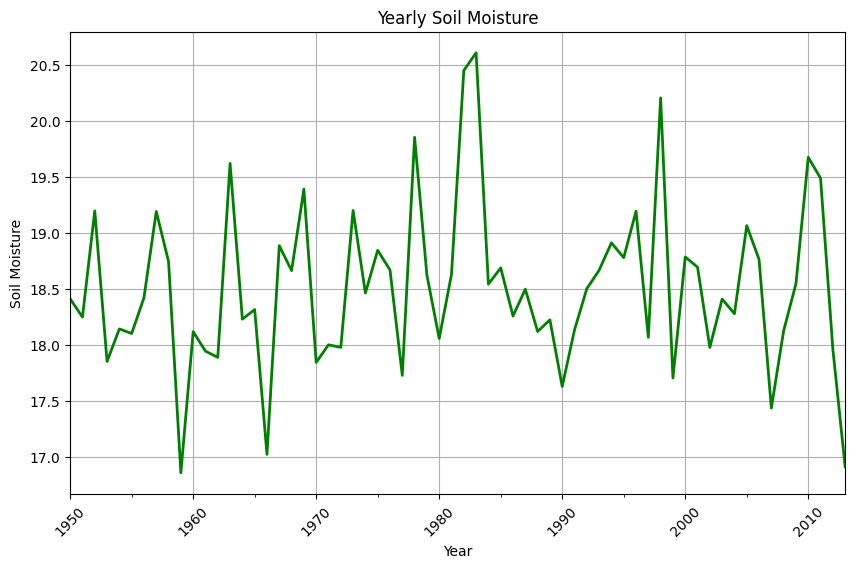

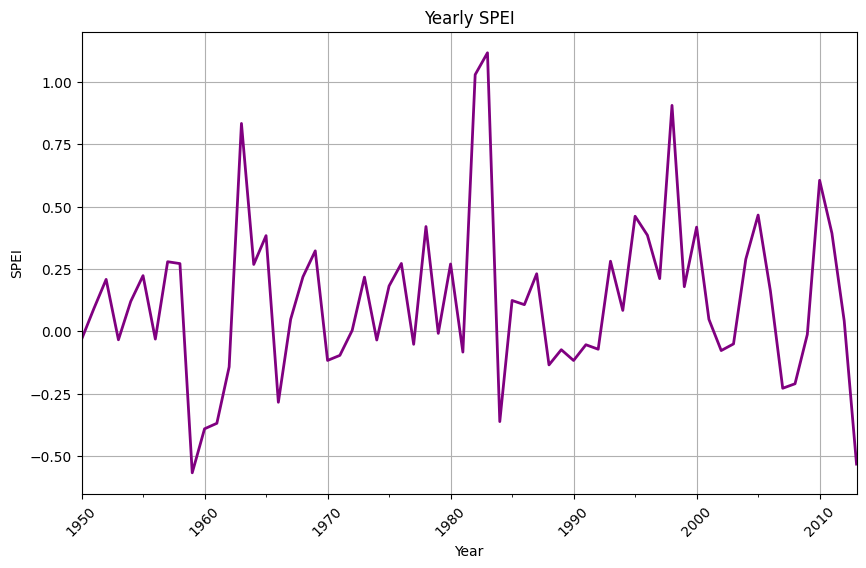

In [ ]:
import matplotlib.pyplot as plt

# Dictionary to map column names to plot titles and colors
plot_settings = {
    'daily_precipitation': ('Yearly Precipitation', 'b', 'Precipitation (mm)'),
    'daily_evapotranspiration': ('Yearly Evapotranspiration', 'orange', 'Evapotranspiration (mm)'),
    'daily_maxTemp': ('Yearly Max Temperature', 'r', 'Max Temp (°C)'),
    'daily_minTemp': ('Yearly Min Temperature', 'c', 'Min Temp (°C)'),
    'daily_soilMoisture': ('Yearly Soil Moisture', 'g', 'Soil Moisture'),
    'spei': ('Yearly SPEI', 'purple', 'SPEI')
}

# Plot each variable individually
for column, (title, color, ylabel) in plot_settings.items():
    plt.figure(figsize=(10, 6))
    if column in df_yearly.columns:
        df_yearly[column].plot(title=title, color=color, linewidth=2)
    else:
        spei_yearly.plot(title=title, color=color, linewidth=2)

    plt.xlabel("Year")
    plt.ylabel(ylabel)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.grid(True)
    plt.show()
